**找到的作业相关的文件链接放这里**
---
Shapes：
https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq?path=%2Fgadm/gadm_410-levels-ADM_1-HUN.gpkg

---
Potential：

自然保护区：
https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq?path=%2Fwdpa/WDPA_Oct2022_Public_shp-HUN.tif

机场：(全球机场数据，需要过滤出匈牙利的部分)

https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq?path=%2F/ne_10m_airports.gpkg

主干道：(全球主干道数据，需要过滤出匈牙利的部分)

https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq?path=%2F/ne_10m_roads.gpkg

海拔最高2000米：

https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq?path=%2Fgebco/GEBCO_2014_2D-HU.nc

匈牙利土地覆盖数据：
(only on suitable land cover classes 和 1000m distance to built up areas）

https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq?path=%2Fcopernicus-glc/PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-HU.tif


---
Weather data：



---
Pypsa：






# Preparation for Group Assignment

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import atlite
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
from rasterio.plot import show
import country_converter as coco
from urllib.request import urlretrieve

## historical weather data from ERA5

In [2]:
fn = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgadm&files=gadm_410-levels-ADM_1-HUN.gpkg"
regions = gpd.read_file(fn)

C:\Users\zxdn\anaconda3\envs\esm-ws-24-25\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: File /vsimem/pyogrio_1f65b80bba56404caad4d269bac7b510 has GPKG application_id, but non conformant file extension
  return ogr_read(


<Axes: >

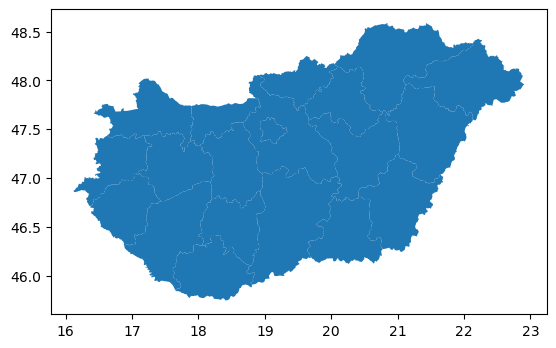

In [3]:
regions.plot()

In [4]:
minx, miny, maxx, maxy = regions.total_bounds
buffer = 0.25

In [5]:
cutout = atlite.Cutout(
  path="HUNGARY-2024-era5.nc",
  module="era5",
  x=slice(minx - buffer, maxx + buffer),
  y=slice(miny - buffer, maxy + buffer),
  time=slice("2024-01-01", "2024-12-31"),
)

C:\Users\zxdn\anaconda3\envs\esm-ws-24-25\Lib\site-packages\atlite\cutout.py:155: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [6]:
cutout.prepare(compression=None)

<Cutout "HUNGARY-2024-era5">
 x = 16.00 ⟷ 23.00, dx = 0.25
 y = 45.50 ⟷ 48.75, dy = 0.25
 time = 2024-01-01 ⟷ 2024-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [7]:
cutout.data

<xarray.Dataset> Size: 228MB
Dimensions:               (x: 29, y: 14, time: 8784)
Coordinates:
  * x                     (x) float64 232B 16.0 16.25 16.5 ... 22.5 22.75 23.0
  * y                     (y) float64 112B 45.5 45.75 46.0 ... 48.25 48.5 48.75
  * time                  (time) datetime64[ns] 70kB 2024-01-01 ... 2024-12-3...
    lon                   (x) float64 232B dask.array<chunksize=(29,), meta=np.ndarray>
    lat                   (y) float64 112B dask.array<chunksize=(14,), meta=np.ndarray>
Data variables: (12/15)
    height                (y, x) float32 2kB dask.array<chunksize=(14, 29), meta=np.ndarray>
    wnd100m               (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    wnd_shear_exp         (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    roughness             (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    influx_toa            (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    ...                    ...
    solar_altitude        (time, y, x) float64 29MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    solar_azimuth         (time, y, x) float64 29MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    temperature           (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    soil temperature      (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    dewpoint temperature  (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
    runoff                (time, y, x) float32 14MB dask.array<chunksize=(100, 14, 29), meta=np.ndarray>
Attributes:
    module:                  era5
    prepared_features:       ['runoff', 'influx', 'temperature', 'height', 'w...
    chunksize_time:          100
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-28T13:23 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
cutout

<Cutout "HUNGARY-2024-era5">
 x = 16.00 ⟷ 23.00, dx = 0.25
 y = 45.50 ⟷ 48.75, dy = 0.25
 time = 2024-01-01 ⟷ 2024-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']